<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%204%3A%20The%20Carbon%20Cycle/EXPLORATION_The_Carbon_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **BEACO2N Notebook 4b: The Carbon Cycle**

Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*



### Learning Outcomes
Working through this notebook, you will learn about:
1. How CO2 background concentrations have been changing since 2016
1. Replacing missing values in a DataFrame
1. Filtering data
1. Creating a new column with a new metric
1. Plotting data


## Table of Contents
1. Notebook Setup
1. Data Filtering
1. Plotting Background CO2 Measurements
1. Conclusion


*Note: In this notebook, there may be some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*




<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

##1. Notebook Setup
In the previous *In Class* notebook, we investigated how background CO2 concentrations change throughout the year. We will now look at a longer time series using BEACO2N data.

You will be exploring the data on your own, but this notebook follows a similar design to the *In Class* notebook. That notebook can be open as a reference as you work through this one!



Python requires us to load packages. We'll be using the same packages we loaded in the *In Class* notebook that we went through together. However since this is a separate notebook, we need to load them in again. **Run the cell below.**

In [ ]:
# Run this cell

# Used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation
import numpy as np
from decimal import Decimal

# Manipulating data in form of series or dataframes
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* then the one below next.

In [ ]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we will be creating.

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

**We will now load in data from several BEACO2N sites from 2017-2023.**

In [ ]:
# Pulling the CO2 data from several BEACO2N sites
CO2_data = 'https://github.com/wintera71/BEACO2N-Modules/raw/refs/heads/main/Lesson%204:%20The%20Carbon%20Cycle/CSVs/CO2_vals_multiyear.csv'

CO2_vals = pd.read_csv(CO2_data, on_bad_lines='skip', index_col = [0], parse_dates=[0])

Now, to replicate what we did with this data in the In Class notebook, let's **replace the data marked as -999 and -111 with NaN values using the `.replace` function** in the cell below.

**Q1: Replace the `...` with your code.**

*Note: If you don't know what -999 and -111 are, take a look at the in-class notebook for detailed explanation!*

In [ ]:
# Run this cell
# Replacing flagged values with NaNs


CO2_vals = CO2_vals.replace(...)
CO2_vals = CO2_vals.replace(...)

NameError: name 'CO2_vals' is not defined

*If you get an error that `CO2_vals` isn't defined, the above cell that defines `CO2_vals` (`CO2_vals = ...`) hasn't been run or hasn't finished running yet.*

***
##2. Data Filtering

Now that we have cleaned our data, let's take a look at our DataFrame `CO2_vals`.

**Q2: In the cell below, use the `head` function to display the first *5* rows of our `CO2_vals` DataFrame.**

In [ ]:
## Q2 Your Code Here


<br>To get an idea of the background concentration, let's pull the 10th percentile of these measurements at every time step.

**Q3: Create a column in the `CO2_vals` DataFrame called `'tenth_per'` that pulls the 10th percentile at every time step.** This is a little tricky, but it is similar to what we did together!

>This is the format the 1st line of your code should follow:<br>
**`<dataframe_name>[<"new_column_name">]` = `<dataframe_name>.quantile(q=0.1, axis=1, numeric_only=True, interpolation='linear')`**
<br>*Feel free to copy and paste the above code into your code cell, then modify everything in **`< >`**.*

>Your second line of code should **display the first 5 rows** of the updated `CO2_vals` DataFrame like we did above. Ensure that the column, **`tenth_per` shows up** when you run the cell!

In [ ]:
# Pull the 10th percentile of the measurements at every time step.
# Q3 YOUR CODE HERE



Great work! Now that we've seen that CO2 concentrations are different in the day and night in the *In Class* notebook, we'll do the same with our larger dataset here. In the code cell below, we will manipulate the `CO2_vals` DataFrame to work with only the daytime hours. <br>**Just run the cell below.**<br>
*Note: We are following the same process as before. However, recall that this time our `CO2_vals` DataFrame has much more data that encompasses a larger span of time!*

In [ ]:
# RUN THIS CELL to filter data for just the daytime hours

# Adding in an hour of day column
CO2_vals['hour'] = CO2_vals.index.time

# Filtering to times between 10:00 AM and 4:00 PM
CO2_vals_filtered = CO2_vals.loc[(CO2_vals['hour'] >= time(10,00)) & (CO2_vals['hour'] <= time(16,00))]

# Dropping the hour column from the dataframe
CO2_vals_filtered = CO2_vals_filtered.drop('hour', axis = 1)

Now we have a filtered dataset, called **`CO2_vals_filtered`**, and this dataset has *only* the rows that contain timestamps reflective of **daytime hours.** <br>
***
##3. Plotting Background CO2 Measurements

**Now it's your turn to plot the data!**<br> Plot the CO2 time series to explore how CO2 concentrations are changing over time. This data is noisy, so we will give you data that takes the mean so the plot you create is more easy to understand. You don't need to understand the code in the cell below.



In [ ]:
## Run this cell
CO2_plot_means = CO2_vals_filtered.rolling(window = 24*14, min_periods = 24*6, center = True).mean() # given to students



**Q4: Replace the `...` with your code below. Plot the `tenth_per` column from the `CO2_plot_means` DataFrame made for you above. Add an x-axis label and y-axis label to the plot.**
> Your code to create your plot should look like this (*feel free to copy and paste*):<br>
`plt.plot(<dataframe_name>.index, <dataframe_name>['<column_name>']`

Text(0.5, 1.0, 'BEACO2N Daytime Background CO2 Measurements')

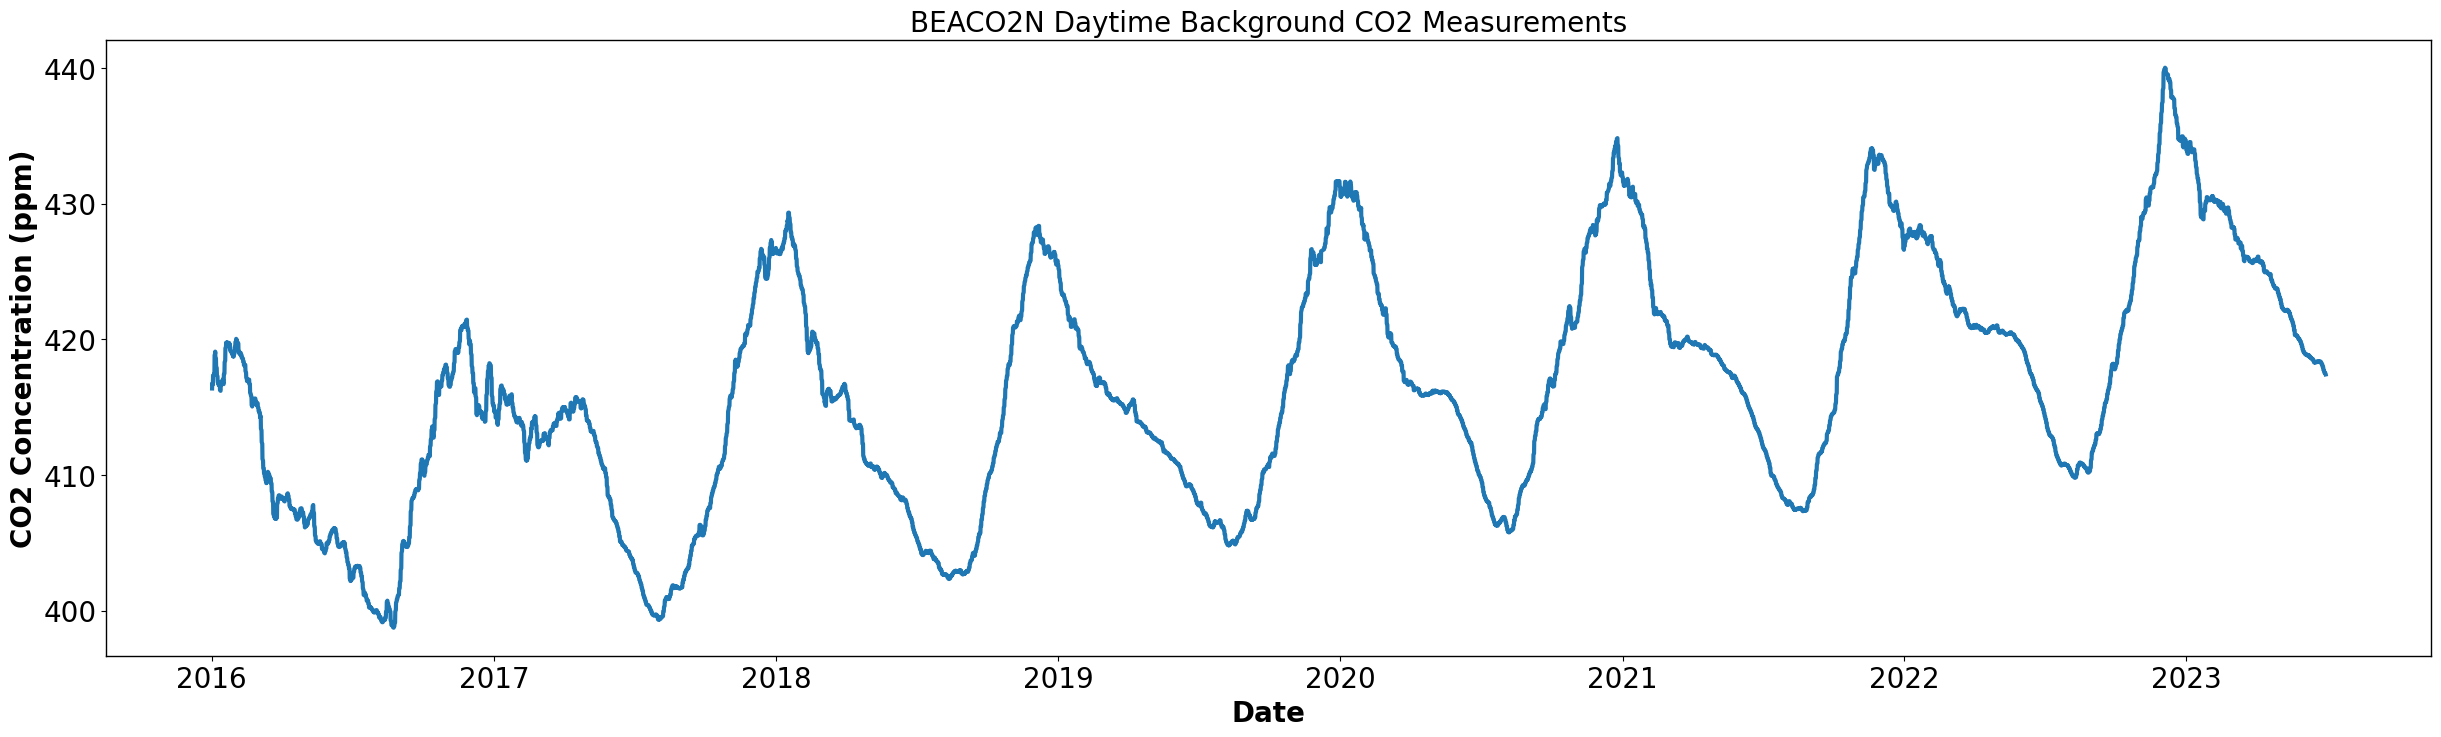

In [ ]:
plt.figure(figsize = (30, 8))

...

# Add a x-axis label
plt.xlabel(...)

# Add a y-axis label (include units!)
plt.ylabel(...)

# Adds a title
plt.title("BEACO2N Daytime Background CO2 Measurements")

Look at the plot above to answer each of the following questions:<br>

* **Q5:** What is the lowest CO2 value seen in the plot and when did it occur? (Approximate the CO2 concentration and the month/season of the year that it occured.)
*   **Q6:** Approximately how much time passes between each dip in the graph?
* **Q7:** What is the highest CO2 value seen in the plot and when did it occur? (Approximate the CO2 concentration and the month/season of the year that it occured.)
* **Q8:** Do you notice a trend in the data?


**Double-click to edit this cell with your answers:**<br>

*   **Q5:** (Your answer here)
*   **Q6:** (Your answer here)
*   **Q7:** (Your answer here)
*   **Q8:** (Your answer here)

***
##4. Conclusion
In this notebook, you learned about:
- Filtering data
- Replacing missing values using `.replace`
- Creating a new column in a DataFrame
- Plotting CO2 Concentration values
- Interpretting the range and period of a plot

#### You've finished **The Carbon Cycle *Student Exploration* notebook**. Good job! Congratulations on finishing **The Carbon Cycle** lesson!

***
***